<Figure size 500x400 with 0 Axes>

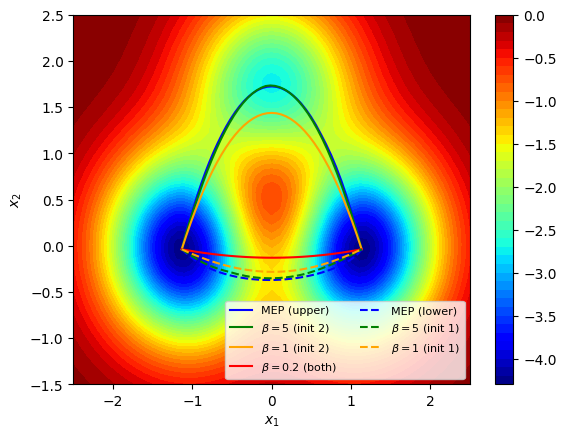

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import torch
import math
from torch.autograd import Variable
import torch.nn as nn
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import pickle


all_path="/content/drive/MyDrive/Colab_Notebooks/2023_mep/1016/"
my_case="th"
casenum="1"
device = "cuda" if torch.cuda.is_available() else "cpu"

if my_case=="th":
#----------------------------------3 holes----------------------------------
  def V_tensor(x):
    x_all=torch.cat(x,axis=1)
    Z=3*torch.exp(-x_all[:,0]**2-(x_all[:,1]-1/3)**2)-3*torch.exp(-x_all[:,0]**2-(x_all[:,1]-5/3)**2)-5*torch.exp(-(x_all[:,0]-1)**2-x_all[:,1]**2)-5*torch.exp(-(x_all[:,0]+1)**2-x_all[:,1]**2)#+1/5*x_all[:,0]**4+1/5*(x_all[:,1]-1/3)**4
    return Z


  x_lb=-2.5
  x_ub=2.5
  y_lb=-1.5
  y_ub=2.5

  dimension=2


plt.figure(figsize=(5,4))
x = np.linspace(x_lb, x_ub,num=51,endpoint=True)
y = np.linspace(y_lb, y_ub,num=51,endpoint=True)
#print("x=",x)
X,Y = np.meshgrid(x,y)
X_new=X.reshape(-1,1)
Y_new=Y.reshape(-1,1)
XY=np.hstack((X_new,Y_new))
for i in range(dimension-2):
  XY=np.hstack((XY,np.zeros(X_new.shape)))

XY_tensor=torch.from_numpy(XY)
X_list = []
for i in range(dimension):
  X_list.append(XY_tensor[:, i:i+1].to(device))
Z = V_tensor(X_list)


Z_new=Z.reshape(X.shape).cpu().detach().numpy()

plt.figure()
CS = plt.contourf(X,Y,Z_new,50,cmap=mpl.cm.jet)
plt.colorbar(CS)


if my_case=="th":
  path_name_all=[all_path+"DL_th_betaonly_li_re_1_beta_onlylg.csv",all_path+"DL_th_betaonly_li_re_1_beta_5.csv",all_path+"DL_th_betaonly_li_re_1_beta1.csv",
        all_path+"DL_th_betaonly_li_re_1_beta0p2.csv",all_path+"DL_th_betaonly_li_re_2_beta_onlylg.csv",all_path+"DL_th_betaonly_li_re_2_beta_5.csv",
        all_path+"DL_th_betaonly_li_re_2_beta1.csv"]
  label_all=[r"MEP (upper)",r"$\beta=5$ (init 2)",r"$\beta=1$ (init 2)",r"$\beta=0.2$ (both)",r"MEP (lower)",r"$\beta=5$ (init 1)",r"$\beta=1$ (init 1)"]
  colors=["blue","green","orange","red","blue","green","orange"]
  lines=["-","-","-","-","--","--","--"]




for i in range(len(path_name_all)):
  data=[]
  with open(path_name_all[i]) as f:
      for row in csv.reader(f, skipinitialspace=True):
          row=[float(x) for x in row[0:]]
          data.append(row)

  x_plot=np.array(data)
  plt.plot(x_plot[0,:],x_plot[1,:],color=colors[i],linestyle=lines[i],label=label_all[i])



plt.xlim((x_lb,x_ub))
plt.ylim((y_lb,y_ub))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.legend(loc="lower right", ncol = 2, shadow = False, fancybox= True,prop = {'size':8})
plt.savefig(all_path+my_case+"_"+casenum+"_"+"path_tra.pdf")





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
